## Alireza Farajtabrizi (97102185) and Mohmmadreza Alimohammadi (97102106) Lab3


In [25]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Part 1

In [26]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

### Importing libraries

### Importing Images and changing them to vectors

In [27]:
from skimage import io

folder_dir = 'Happy'
hap_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        hap_img.append(img)      
hap_img=np.array(hap_img)
print(hap_img.shape)

folder_dir = 'Surprise'
sup_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        sup_img.append(img)      
sup_img=np.array(sup_img)
print(sup_img.shape)

(85, 180000)
(88, 180000)


### Spliting Dataset

In [28]:
from sklearn.model_selection import train_test_split

X_train_hap, X_test_hap, y_train_hap, y_test_hap = train_test_split(hap_img,np.ones(hap_img.shape[0]), train_size=50,random_state=np.random.randint(100))
X_train_sup, X_test_sup, y_train_sup, y_test_sup = train_test_split(sup_img,np.zeros(sup_img.shape[0]), train_size=50,random_state=np.random.randint(100))

X_train=np.append(X_train_hap,X_train_sup,axis=0)
y_train=np.append(y_train_hap,y_train_sup)

X_test=np.append(X_test_hap,X_test_sup,axis=0)
y_test=np.append(y_test_hap,y_test_sup)


## Part 2

### Fitting and Printing Egien Vector

In [29]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n=20

pca = PCA(n_components=n)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)   
X_test_pca  = pca.transform(X_test)  

lda = LDA()
lda.fit(X_train_pca,y_train)
print('Number of Vectors :',lda.coef_.shape[0])
print('The Vector :',lda.coef_[0])


Number of Vectors : 1
The Vector : [ 4.70405615e-05  8.14786377e-05 -1.51346300e-04  3.38122337e-04
 -4.84472132e-04 -2.07806127e-03  7.09027332e-04  2.31696041e-03
 -3.31806509e-04 -2.60642896e-04  2.68609168e-04  8.55368377e-04
  8.48591168e-04  2.32499264e-04 -3.99955583e-04 -7.45231162e-06
  1.54428306e-04 -6.00815524e-04 -1.11252298e-04 -3.39269595e-04]


#### همانطور که مشاهده میکنید تعداد بردار های بدست آمده یکی است در این روش تعداد بردار ویژه ها یه دونه کمتر از کلاس ها خواهد بود


### Plotting Egien Face

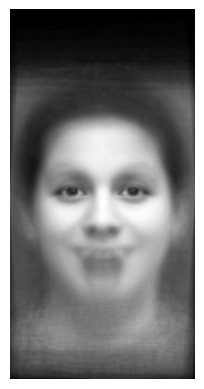

In [30]:
Fisher_inv_Vector=pca.inverse_transform(lda.coef_)
Fisher_inv_Vector=Fisher_inv_Vector.reshape(N1,N2)

plt.figure()
plt.imshow(Fisher_inv_Vector, cmap='gray')
plt.axis('off')
plt.show()

#### همانطور که می بینید این بردار در حوالی چشم واضح است و در حاشیه های تصویر محو اما در ناحیه دهان که محل تفاوت دو کلاس سایه ای از هر دو حالت شاد و متجب دیده می شود

## Part 3

### Plotting Accuracies for Different Number of Components with PCA and Fisher Method

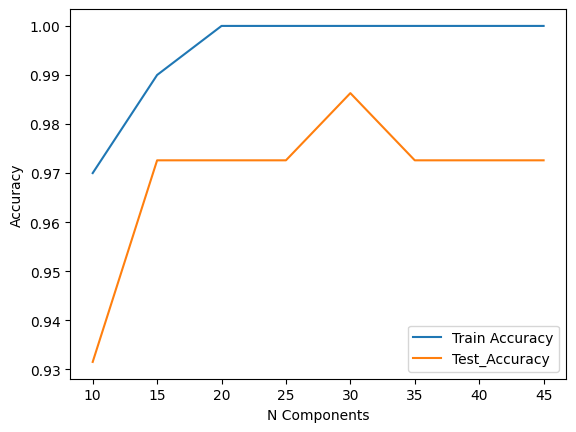

Components Count: 30 Test max Accuracy  : 0.9863
Components Count: 30 Train max Accuracy : 1.0000


In [31]:
from sklearn.metrics import accuracy_score
train_Acu_LDA = []
test_Acu_LDA  = []


for i in range(10,50,5):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)   
    X_test_pca  = pca.transform(X_test)  

    lda = LDA()
    lda.fit(X_train_pca,y_train)
    train_Acu_LDA = np.append(train_Acu_LDA,accuracy_score(lda.predict(X_train_pca), y_train))
    test_Acu_LDA  = np.append(test_Acu_LDA,accuracy_score(lda.predict(X_test_pca), y_test))

plt.figure()
plt.plot(np.arange(10,50,5), train_Acu_LDA)
plt.plot(np.arange(10,50,5), test_Acu_LDA)
plt.legend(['Train Accuracy', 'Test_Accuracy'])
plt.xlabel('N Components')
plt.ylabel('Accuracy')
plt.show()

print("Components Count:",np.argmax(test_Acu_LDA)*5+10,"Test max Accuracy  :",f'{test_Acu_LDA[np.argmax(test_Acu_LDA)]:.4f}')
print("Components Count:",np.argmax(test_Acu_LDA)*5+10,"Train max Accuracy :",f'{train_Acu_LDA[np.argmax(test_Acu_LDA)]:.4f}')

### Plotting Accuracies for Different Number of Components with PCA and KNN Method

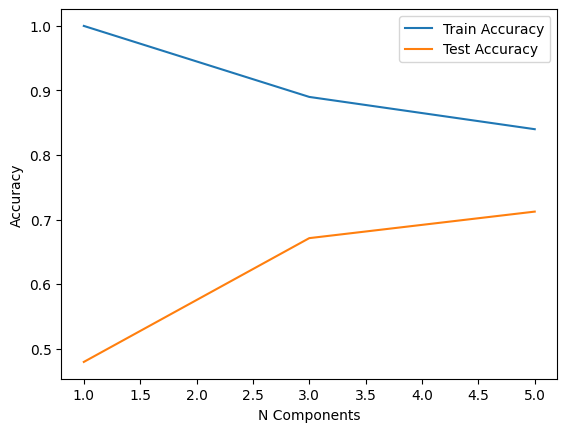

Neighbors Count: 5 Test max MSE  : 0.7123
Neighbors Count: 5 Train max MSE : 0.8400


In [32]:
from sklearn.neighbors import KNeighborsClassifier

train_ACU_KNN = []
test_Acu_KNN  = []

for i in range(1,7,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    train_ACU_KNN = np.append(train_ACU_KNN,accuracy_score(neigh.predict(X_train), y_train))
    test_Acu_KNN  = np.append(test_Acu_KNN,accuracy_score(neigh.predict(X_test), y_test))

plt.figure()
plt.plot(np.arange(1,7,2), train_ACU_KNN)
plt.plot(np.arange(1,7,2), test_Acu_KNN)
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('N Components')
plt.ylabel('Accuracy')
plt.show()

print("Neighbors Count:",np.argmax(test_Acu_KNN)*2+1,"Test max MSE  :",f'{test_Acu_KNN[np.argmax(test_Acu_KNN)]:.4f}')
print("Neighbors Count:",np.argmax(test_Acu_KNN)*2+1,"Train max MSE :",f'{train_ACU_KNN[np.argmax(test_Acu_KNN)]:.4f}')

#### همانطور که قابل مشاهده است اختلاف معنا داری بین دو روش وجود دارد و در روش فیشر اگر تعداد بردار های پی سی ای را به اندازه کافی بگیریم دقت در حدود 100 درصد است در حالی که دقت  نزدیک ترین همسایه  بین 70 تا 85 است